In [1]:
# example purpose only
import sys
sys.path.append('../')
from src import ht2
from src.ht2.tools.ocr_labeler import OCRLabeler

In [2]:
labeler = OCRLabeler("/data/hyt_set/imgs_segments/",shuffle=True)

total 1329 images
1198 images left


0it [00:00, ?it/s]

image 0 of 1198
path: /data/hyt_set/imgs_segments/613927181100130-1_0010.jpg


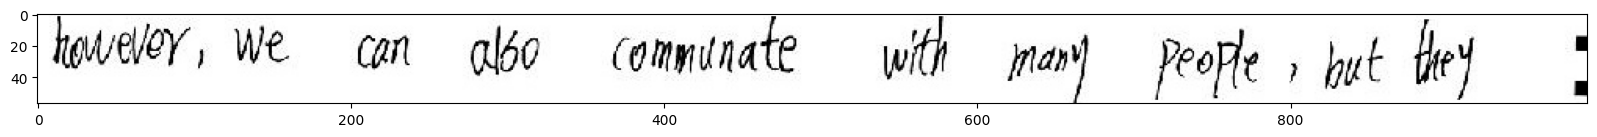

[plabel 0] however, we can also communicate with many people, but they
[plabel 1] . however, we can also communate with many people, but they
[plabel matchs]  False


In [ ]:
labeler.label_session(exts = ["","_hyt"])


In [6]:
import sys
sys.path.append('../')
from src import ht2
# TODO revise hyt with label after labeling is done
from glob import glob
from os.path import join,basename
import os
import json
import cv2
from pprint import pprint
from src.ht2.tools.labeling_ops import parse_transcription_label_1
from tqdm import tqdm

# parse labeled data
label_root = "/data/haotian-test2-pre_anno/"
image_root = "/data/hyt_set/imgs/"
export_root = "/data/hyt_segments/"
os.makedirs(export_root,exist_ok=True)
all_label_paths = glob(join(label_root,"*.json"))
for label_path in tqdm(all_label_paths):
    with open(label_path,"r") as f:
        label = json.load(f)
    img_path = join(image_root,label_path.split("/")[-1][:-5]+".jpg")
    # pprint(label)
    img = cv2.imread(img_path)
    cleaned_labels = parse_transcription_label_1(img,label)
    for idx,cleaned_label in enumerate(cleaned_labels):
        cv2.imwrite(join(export_root,"{}_{}.jpg".format(basename(img_path)[:-4],idx)),cleaned_label["img"])
        with open(join(export_root,"{}_{}_human1.txt".format(basename(img_path)[:-4],idx)),"w") as f:
            f.write(cleaned_label["text"])
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:06<00:00, 11.66it/s]
